# Scientific Data Visualization for AI & Engineering (PhD / Research Level)
Anne-Laure MEALIER, Centrale Mediterranée



## How to use this notebook

This is a **course notebook**. It is designed to be:
- **readable** as lecture notes,
- **runnable** as a lab,
- **extendable** for projects (Dash + PostgreSQL/TimescaleDB + Grafana),
- **research-grade** for Bayesian uncertainty and ML interpretability (SHAP).

### Recommended environment
- Python ≥ 3.12
- JupyterLab
- Docker + Docker Compose (for the monitoring stack)

### Quick start (recommended)
1. Start the stack: `docker compose up -d --build`
2. Run the notebook from top to bottom
3. Open:
   - Grafana: http://localhost:3000 (default admin/admin)
   - Dash app: http://localhost:8050

> Note: Bayesian MCMC and SHAP can be heavy. Reduce draws/sample sizes if needed.


# 📌 Notebook Plan (Clickable Table of Contents)

> Tip: In JupyterLab, open **View → Table of Contents** (or the left “Outline” panel) for an always-correct clickable navigation.

---

## 0. Setup
- [Setup & Imports](#0-setup--imports)
- [How to use this notebook](#how-to-use-this-notebook)

---

## 1. Scientific & Societal Foundations of Data Visualization
- [Visualization as an epistemic operator](#1-scientific--societal-role-of-data-visualization-phd-depth)
- [Ethics: misleading charts, uncertainty, and trust](#1-scientific--societal-role-of-data-visualization-phd-depth)
- [Exercise: ethics + rigor](#exercise-1-ethics--rigor)

---

## 2. Seaborn — Statistical Visualization (Research-grade)
- [Histogram + KDE](#21-histogram--kde)
- [ECDF](#22-ecdf)
- [Boxplot vs Violin vs Stripplot](#23-boxplot-vs-violin-vs-stripplot)
- [Swarmplot](#24-swarmplot-sampled)
- [Point estimates with CI](#25-point-estimates-with-uncertainty-ci)
- [Regression with CI (lmplot)](#26-regression--ci-lmplot)
- [Faceting / Small multiples](#27-faceting-small-multiples)
- [Pairplot](#28-pairplot)
- [Correlation heatmap](#29-correlation-heatmap)
- [Joint distribution + residual diagnostics](#210-joint-distributions--residual-view)
- [Exercise: Seaborn](#exercise-2-seaborn)

---

## 3. Plotly — Interactive Visualization
- [Scatter + marginal distributions](#31-scatter-with-marginal-distributions)
- [Animation over time](#32-animation-over-time)
- [Multi-line time series](#33-multi-line-time-series)
- [Interactive distributions (hist/violin/box)](#34-distributions-histviolinbox)
- [Heatmap + parallel coordinates](#35-heatmap-and-parallel-coordinates)
- [Hierarchies: treemap & sunburst](#36-hierarchies-treemap--sunburst)
- [Exercise: Plotly](#exercise-3-plotly)

---

## 4. Bayesian Inference & Uncertainty (3 Chapters)
- [Chapter 1 — Beta–Binomial](#chapter-1--betabinomial-conjugate--visualization)
- [Chapter 2 — Bayesian Linear Regression (MCMC + PPC)](#chapter-2--bayesian-linear-regression-mcmc--diagnostics--ppc)
- [Chapter 3 — Hierarchical Model + Calibration](#chapter-3--hierarchical-model--calibration-diagnostics)
- [Exercise: Bayesian](#exercise-4-bayesian)

---

## 5. Production Monitoring Stack (TimescaleDB + Grafana + Dash)
- [Schema design](#51-minimal-sql-schema-model_metrics)
- [Insert monitoring data](#52-insert-synthetic-monitoring-data-into-the-db)
- [Grafana queries](#53-grafana-example-sql-queries)

---

## 6. Explainability — SHAP (Research-level)
- [SHAP overview](#6-explainability-shap-research-level)
- [Exercises: SHAP](#exercise-5-shap)

---

## 7. Final Project
- [Bayesian uncertainty monitoring + explainability](#7-final-project-bayesian-uncertainty-monitoring--explainability)

---

## 8. Bibliography
- [Research bibliography (20+)](#8-research-bibliography-20)

---

### Appendix
- [Reading notes (graphical inference & uncertainty)](#appendix--reading-notes-graphical-inference--uncertainty)

## 0. Setup & Imports
We standardize plotting defaults and set seeds for reproducibility.


In [83]:

import os
import numpy as np
import pandas as pd

np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer, load_diabetes

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


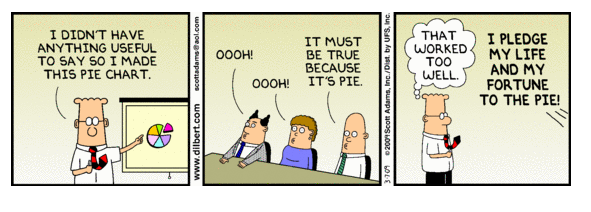

In [84]:
from IPython.display import Image, display

display(Image("images/Dilbert_1.png"))


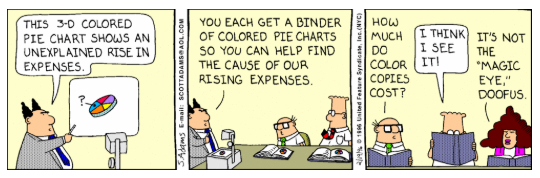

In [85]:
display(Image("images/Dilbert_2.png"))

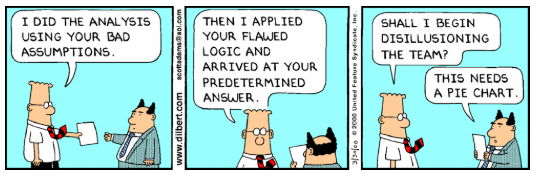

In [86]:
display(Image("images/Dilbert_3.png"))

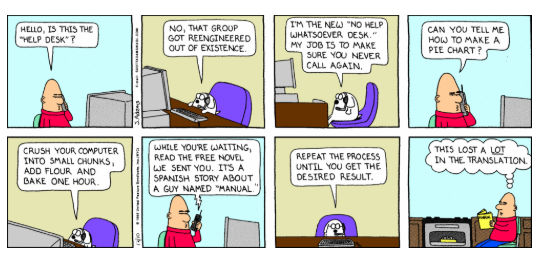

In [87]:
display(Image("images/Dilbert_4.png"))

### 1.1 Visualization as an Epistemic Operator

A visualization is not merely a picture of data. It is an epistemic operator — a transformation that shapes how knowledge is constructed from raw observations.

We can formalize this as:

V = f(D, M, P)

Where:

- D represents the data, often high-dimensional, noisy, incomplete, or uncertain.
- M represents the modeling or aggregation layer applied before visualization (e.g., smoothing, binning, averaging, regression).
- P represents the perceptual encoding (position, length, area, color, animation, interaction).

This transformation is never information-neutral.

First, visualization compresses information. High-dimensional structures are projected into two or three dimensions. Aggregation reduces variability. Smoothing suppresses local fluctuations. These operations make patterns cognitively accessible, but at the cost of losing detail.

Second, visualization can introduce bias. The choice of scale, bin width, smoothing bandwidth, or color palette changes what appears salient. A log-scale may reveal multiplicative structure, while a linear scale may obscure it. The epistemic message depends on design decisions.

Third, visualization can hide uncertainty. Confidence intervals, posterior distributions, measurement error, and sampling variability are often omitted for clarity. When uncertainty is not explicitly encoded, the viewer may interpret estimates as precise truths.

Therefore, a visualization is not just a display mechanism; it is a knowledge-producing transformation. It mediates between data and interpretation.


### 1.2 Ethical Dimension of Data Visualization

Because visualization influences perception, it also influences decisions. In domains such as healthcare, climate science, public policy, and finance, visual representations can directly affect human behavior and institutional choices.

Ethical issues arise when visual design distorts interpretation.

Axis truncation can exaggerate small differences. Cherry-picking time windows can fabricate trends. Selective aggregation can mask subgroup effects. Deceptive encodings, such as using area or volume to represent quantities, can mislead due to perceptual biases.

Equally problematic is the omission of uncertainty. Presenting point estimates without intervals suggests unwarranted confidence. Omitting sample size hides statistical fragility. Removing variability may simplify the visual but weakens epistemic transparency.

Ethical visualization therefore requires explicit communication of:

- uncertainty,
- sample size,
- modeling assumptions,
- data provenance.

The responsibility of the data scientist is not only technical accuracy but epistemic integrity. A visualization should clarify without manipulating, simplify without distorting, and persuade without deceiving.


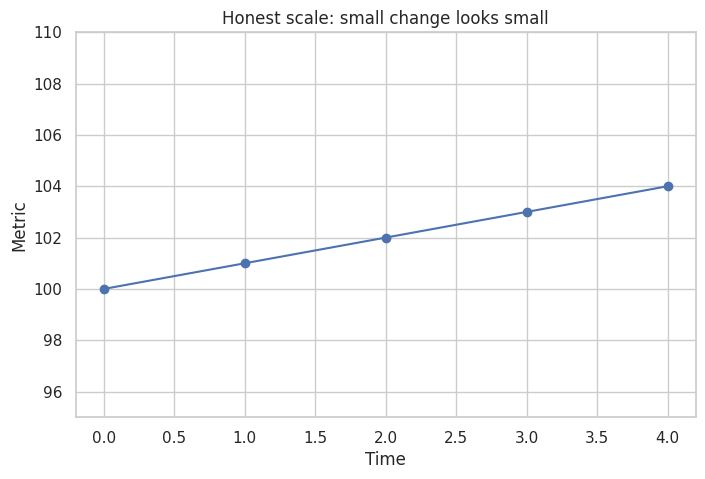

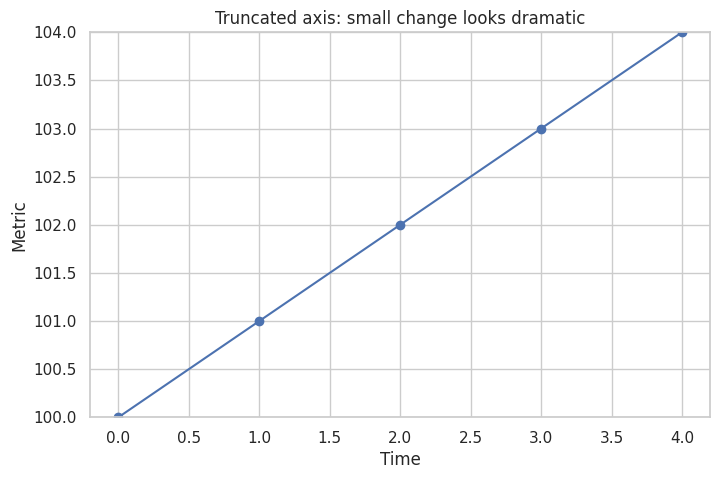

In [88]:

x = np.arange(5)
y = np.array([100, 101, 102, 103, 104])

plt.figure()
plt.plot(x, y, marker="o")
plt.ylim(95, 110)
plt.title("Honest scale: small change looks small")
plt.xlabel("Time")
plt.ylabel("Metric")
plt.show()

plt.figure()
plt.plot(x, y, marker="o")
plt.ylim(100, 104)
plt.title("Truncated axis: small change looks dramatic")
plt.xlabel("Time")
plt.ylabel("Metric")
plt.show()


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”



### Exercise 1 (ethics + rigor)
1. Find a public chart you consider misleading.
2. Identify the design decision causing distortion.
3. Propose a corrected visualization and justify it scientifically.



## 2. Statistical Visualization with Seaborn (Research-grade practice)

Seaborn is excellent for **distribution-centric** visualization:
- histograms + KDE: Kernel Density Estimate (Instead of bars, it gives you a smooth curve that represents the distribution),
- ECDF (stands for Empirical Cumulative Distribution Function)
- categorical distributions (box/violin/strip/swarm),
- regression with confidence intervals,
- multivariate exploration (pairplot),
- correlation structures (heatmaps, clustermaps).

Principle: prefer plots that reveal **variance, skewness, multimodality, outliers, and sample size**.


In [52]:
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”


### 2.1 Histogram + KDE

**What this shows**  
A histogram estimates the empirical distribution; the KDE provides a smooth density estimate.

**Why it matters (scientifically)**  
- Reveals skewness, multimodality, heavy tails, and outliers that the mean hides.  
- Supports model choice (Gaussian vs log-normal vs mixture).

**What to look for**  
- Long right tail? multiple bumps? strong asymmetry?

**Pitfalls**  
- KDE bandwidth can over/under-smooth.  
- Bin width changes interpretation; report choices when stakes are high.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


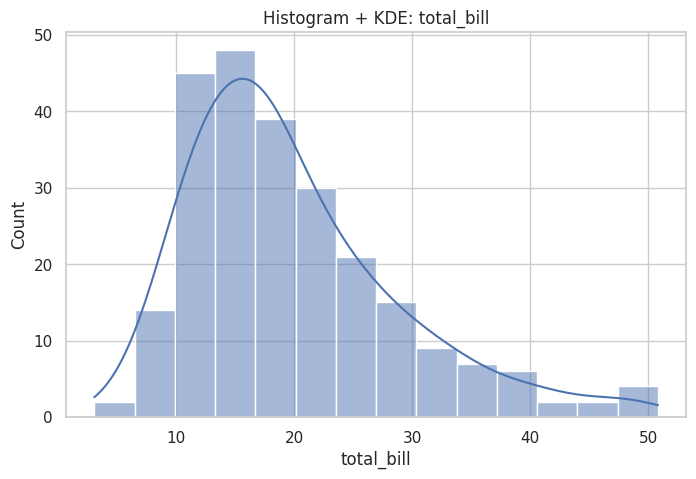

In [53]:

sns.histplot(tips, x="total_bill", kde=True)
plt.title("Histogram + KDE: total_bill")
plt.show()


**Research use cases**
- Exploratory distribution diagnostics (skew, multimodality, heavy tails), and **likelihood selection** (Gaussian vs Student-t vs log-normal).
- Pre-registration of analysis choices: binning strategy and KDE bandwidth for reproducibility.

**When not to use**
- When exact quantiles matter more than shape (prefer ECDF / quantile plots).
- When n is tiny: KDE can hallucinate structure; show raw points + ECDF.

**Alternative plots**
- ECDF, Q–Q plot, ridge/joy plots for many groups, log-scale histograms for heavy tails.

**Typical reviewer criticisms**
- “Bandwidth / bin width seems arbitrary—show sensitivity analysis.”
- “KDE oversmooths / undersmooths; please provide ECDF or raw points.”
- “Are tails real or artifacts of smoothing / clipping?”

**Plot-specific notes**
- KDE bandwidth: report the method (Scott/Silverman or chosen bandwidth) and show 1–2 alternatives in appendix.
- For heavy tails, consider log-transform or robust likelihood and justify.


### 2.2 ECDF

**What this shows**  
The ECDF plots \( \hat F(x) = P(X \le x) \) directly from data—no binning, minimal assumptions.

**Power**  
- Robust comparison of distributions across groups.  
- Easy to read quantiles (median, 90th percentile, etc.).

**Pitfalls**  
- Dense data can look like a solid block; consider transparency or subsampling.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


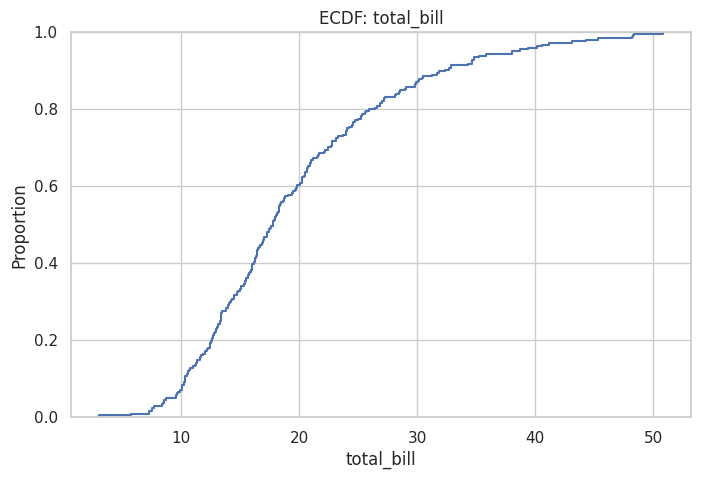

In [54]:

sns.ecdfplot(tips, x="total_bill")
plt.title("ECDF: total_bill")
plt.show()


**Research use cases**
- **Distribution comparison** across groups without binning; direct reading of quantiles and stochastic dominance.
- Supports **robust reporting** in papers: median, IQR, tail probabilities.

**When not to use**
- When audiences need intuitive density “shape” (pair with histogram/KDE).
- When many groups overlap heavily: readability suffers without faceting.

**Alternative plots**
- Quantile function plot, violin/box+strip, ridgeline, CDF difference plot.

**Typical reviewer criticisms**
- “Where are confidence bands?”
- “Group sample sizes differ—show n and consider weighted comparisons.”

**Plot-specific notes**
- ECDF confidence bands: use bootstrap bands (e.g., 95% pointwise) for publication figures.
- Consider two-sample tests (KS/AD) as complement, not replacement.


### 2.3 Boxplot vs Violin vs Stripplot

**Why three views?**  
- **Boxplot**: robust summary (median, IQR) + outliers.  
- **Violin**: shape of the distribution (kernel density) + quartiles.  
- **Stripplot**: raw points—exposes sample size and unusual clusters.

**Scientific context**  
Use these to avoid “mean-only” reporting and to detect heterogeneity that invalidates simplistic models.

**Pitfalls**  
- Violin depends on KDE settings; always sanity-check with raw points when possible.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


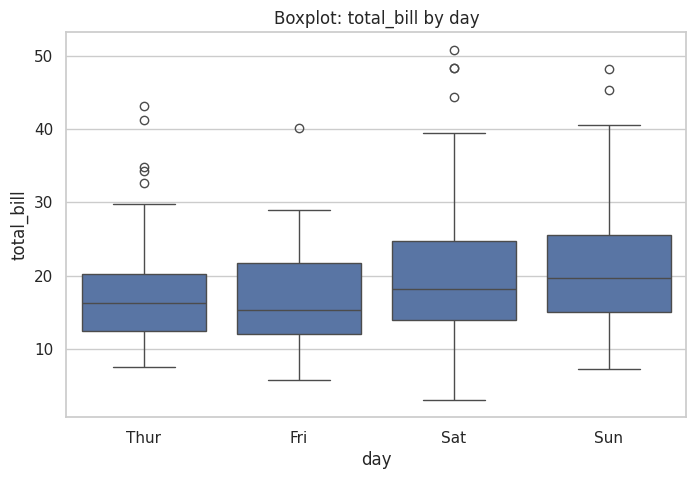

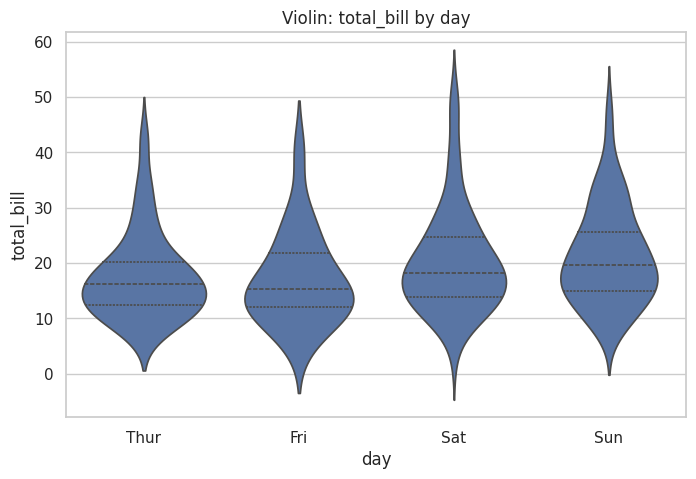

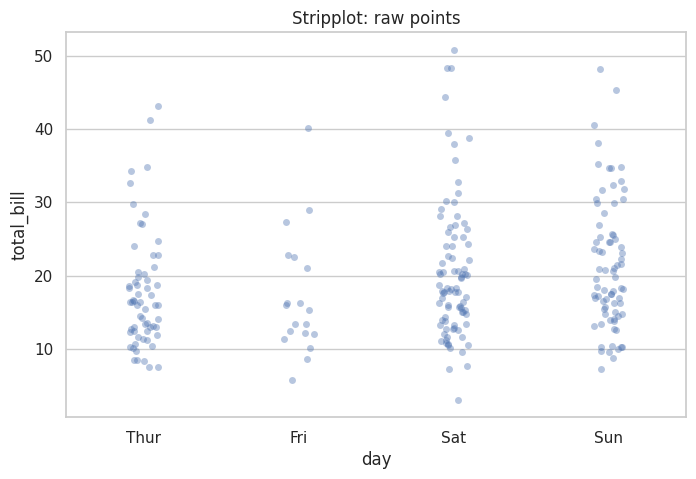

In [55]:

sns.boxplot(tips, x="day", y="total_bill")
plt.title("Boxplot: total_bill by day")
plt.show()

sns.violinplot(tips, x="day", y="total_bill", inner="quartile")
plt.title("Violin: total_bill by day")
plt.show()

sns.stripplot(tips, x="day", y="total_bill", jitter=True, alpha=0.4)
plt.title("Stripplot: raw points")
plt.show()


**Research use cases**
- Triangulation: robust summary (box) + shape (violin) + sample size & heterogeneity (strip).
- Useful for **replicability checks**: if violin says bimodal but strip is sparse → KDE artifact risk.

**When not to use**
- With very large n: strip becomes unreadable; switch to hexbin/jittered density.
- When privacy constraints forbid showing raw points (use aggregated quantiles + uncertainty).

**Alternative plots**
- Raincloud plot, ridge plot, boxenplot for large n, beeswarm with sampling.

**Typical reviewer criticisms**
- “Kernel density hides outliers / exaggerates modes; show sensitivity or raw points.”
- “Are differences statistically meaningful? Add uncertainty intervals / effect sizes.”

**Plot-specific notes**
- For many categories, rotate labels and avoid overplotting; annotate n per group.


### 2.4 Swarmplot (sampled)

**What this shows**  
A swarmplot is a stripplot with collision avoidance so points don’t overlap as much.

**Why it’s powerful**  
- Makes sample size and micro-structure visible (clusters, gaps).  
- Great for sanity-checking summary plots.

**Pitfall**  
- Slow on large datasets → sample carefully and report sampling.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


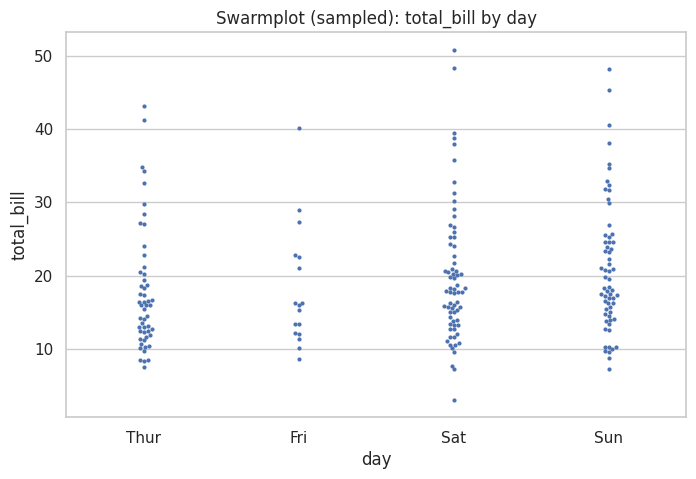

In [56]:

sns.swarmplot(tips.sample(200, random_state=42), x="day", y="total_bill", size=3)
plt.title("Swarmplot (sampled): total_bill by day")
plt.show()


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”


### 2.5 Point estimates with uncertainty (CI)

**What this shows**  
Point estimates per category plus 95% confidence intervals.

**Scientific role**  
- Communicates uncertainty about group-level estimates.  
- Prevents overconfident comparisons.

**Pitfalls**  
- CI ≠ probability the parameter is in the interval (frequentist interpretation).  
- If assumptions fail, prefer robust or Bayesian intervals.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


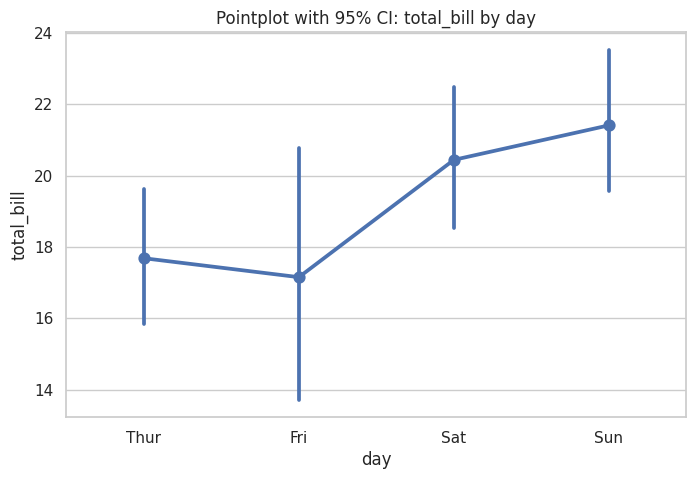

In [57]:

sns.pointplot(tips, x="day", y="total_bill", errorbar=("ci", 95))
plt.title("Pointplot with 95% CI: total_bill by day")
plt.show()


**Research use cases**
- Communicate group-level effects with uncertainty; common in experimental papers (A/B, treatment groups).
- Great for quickly spotting effect direction + overlap, before formal modeling.

**When not to use**
- When distributions are highly non-Gaussian and mean is misleading—use medians/quantiles.
- When observations are not i.i.d. (clustered/time-series): CI may be invalid without clustering correction.

**Alternative plots**
- Bootstrap CI around median, Bayesian credible intervals, hierarchical model estimates, forest plots.

**Typical reviewer criticisms**
- “Which CI? How computed? Assumptions?”
- “CI overlap is not a significance test—report effect sizes and model-based inference.”

**Plot-specific notes**
- Prefer showing the estimator explicitly (mean/median) and specify resampling scheme (bootstrap, clustered bootstrap).


### 2.6 Regression + CI (lmplot)

**What this shows**  
A fitted regression line with a confidence band.

**Scientific role**  
- Quick diagnostic of linear trend and group interactions.  
- Helps detect non-linearity and heteroscedasticity visually.

**Pitfalls**  
- A nice line does not imply causality.  
- The confidence band is about the mean relationship, not future observations.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


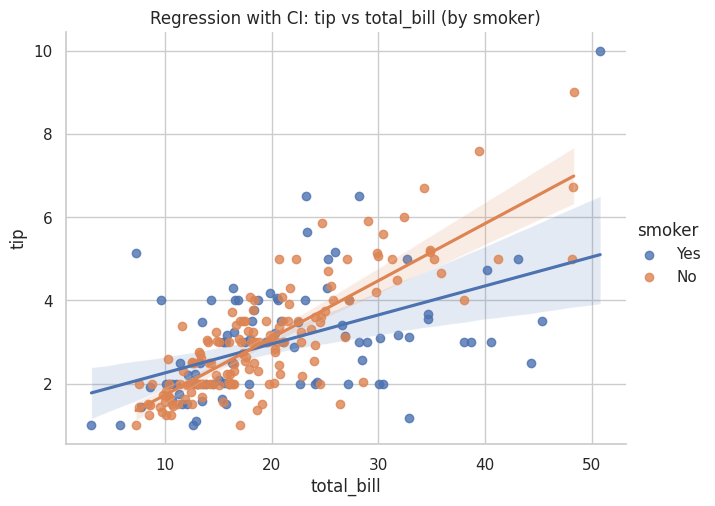

In [58]:

sns.lmplot(tips, x="total_bill", y="tip", hue="smoker", height=5, aspect=1.3)
plt.title("Regression with CI: tip vs total_bill (by smoker)")
plt.show()


**Research use cases**
- Quick model criticism: linearity, group interactions, and residual structure hints.
- Preliminary evidence for specifying parametric vs nonparametric trend models.

**When not to use**
- When confounding is strong and unconditioned plots are misleading (use faceting/controls).
- When heteroscedasticity is present: CI around mean trend can be deceptive.

**Alternative plots**
- GAM / LOESS with uncertainty, partial residual plots, binned scatter with CIs, posterior regression bands (Bayesian).

**Typical reviewer criticisms**
- “Causality is implied; please temper claims.”
- “Show residual diagnostics / heteroscedasticity checks.”
- “Include uncertainty for predictions, not only mean trend.”

**Plot-specific notes**
- Distinguish CI of mean trend vs prediction interval; consider both in appendix.


### 2.7 Faceting (small multiples)

**What this shows**  
The same relationship repeated across subsets (conditioning on variables).

**Power**  
- Helps detect Simpson’s paradox and confounding.

**Pitfall**  
- Small panels can hide uncertainty; consider adding CIs or sample-size annotations.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


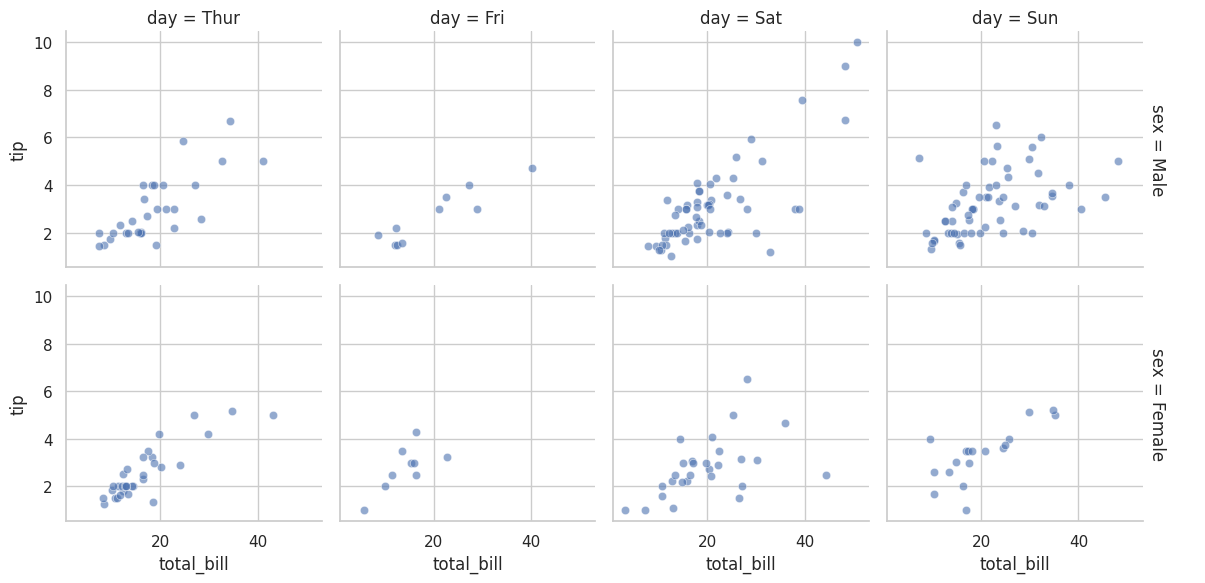

In [59]:

g = sns.FacetGrid(tips, col="day", row="sex", height=3, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", alpha=0.6)
g.add_legend()
plt.show()


**Research use cases**
- Visual conditioning to expose confounding and Simpson’s paradox.
- Supports stratified reporting and fairness analyses (subgroup behavior).

**When not to use**
- When each facet has tiny n: patterns unstable; consider hierarchical pooling and uncertainty overlays.

**Alternative plots**
- Small multiples with model-based estimates + intervals, interaction plots, partial dependence by subgroup.

**Typical reviewer criticisms**
- “Facets obscure uncertainty; add intervals or sample sizes.”
- “Multiple comparisons across facets; confirm with modeling.”

**Plot-specific notes**
- Add per-panel n and consider consistent axes across facets to avoid framing effects.


### 2.8 Pairplot

**What this shows**  
Pairwise scatter plots and univariate distributions for multiple variables.

**Scientific role**  
- Hypothesis generation: clusters, separability, correlations, outliers.

**Pitfall**  
- Multiple comparisons: validate patterns with tests or hold-out evaluation.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


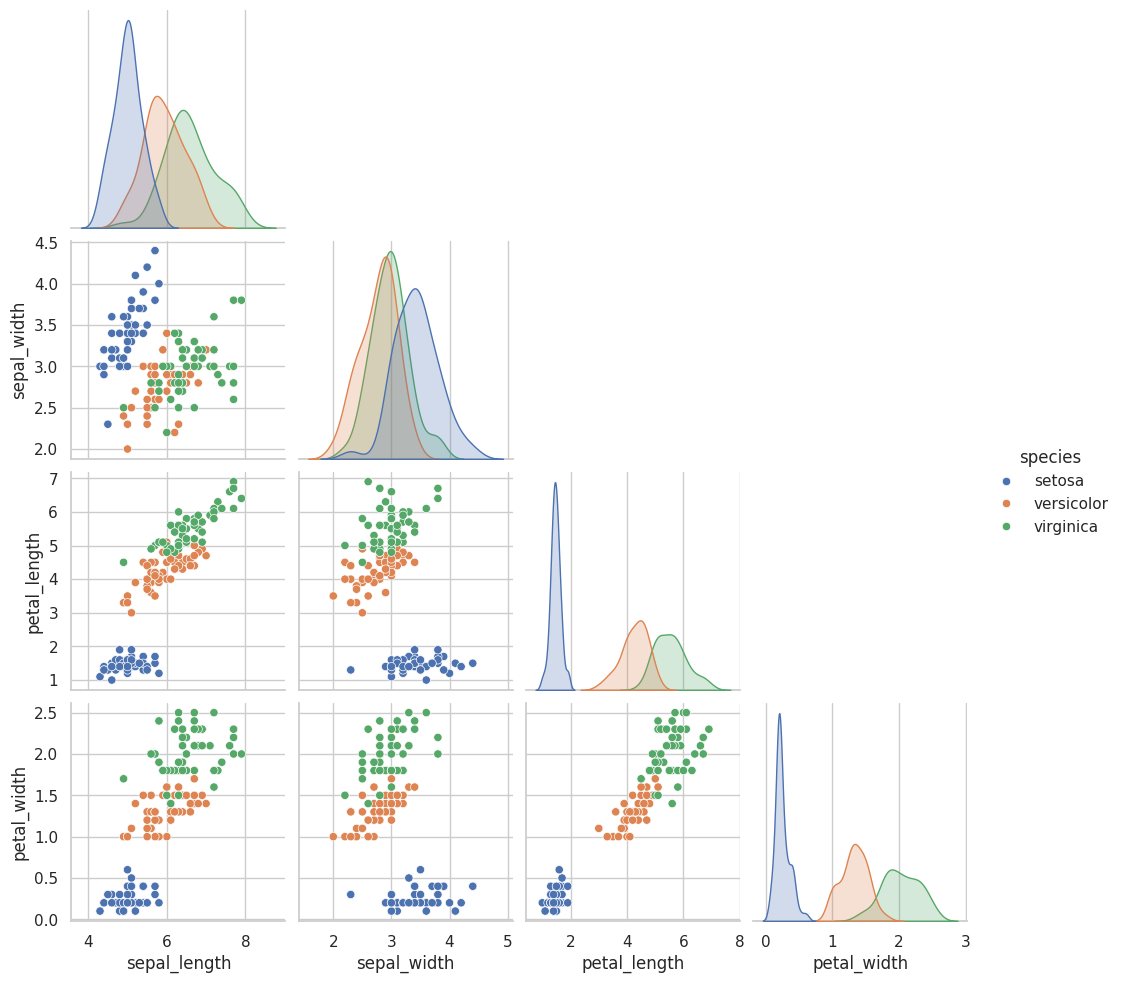

In [60]:

sns.pairplot(iris, hue="species", corner=True)
plt.show()


**Research use cases**
- Early-stage structure discovery (clusters, separability, nonlinear relations).
- Detect outliers that dominate downstream modeling.

**When not to use**
- High dimensionality (p>8) or huge n → unreadable; use sampling or dimensionality reduction first.

**Alternative plots**
- Correlation/MI matrix + scatter for selected pairs, UMAP/t-SNE (with caveats), parallel coordinates.

**Typical reviewer criticisms**
- “Exploratory findings need validation; avoid overclaiming.”
- “Sampling method not described; reproducibility concerns.”

**Plot-specific notes**
- Document sampling and random seed; predefine which pairs are reported in the paper.


### 2.9 Correlation heatmap

**What this shows**  
A matrix of pairwise correlations.

**Scientific role**  
- Screens for redundancy and multicollinearity before modeling.

**Pitfalls**  
- Correlation ≠ causation; nonlinear dependence may be missed.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


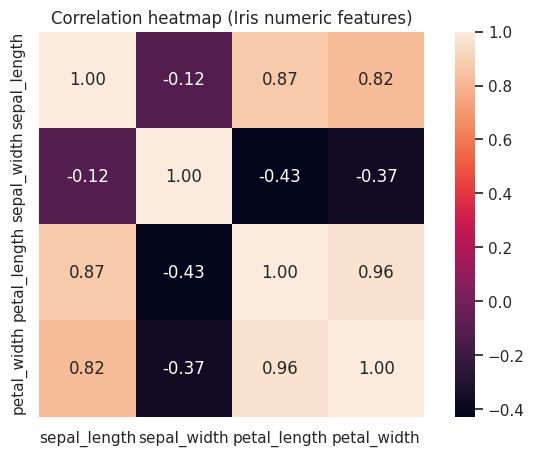

In [61]:

corr = iris.drop(columns=["species"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation heatmap (Iris numeric features)")
plt.show()


**Research use cases**
- Multicollinearity screening; feature redundancy; quick data sanity checks.
- Supports PCA/regularization decisions.

**When not to use**
- When relationships are nonlinear or ordinal: Pearson can mislead (use Spearman / MI).

**Alternative plots**
- Spearman correlation heatmap, mutual information matrix, partial correlation, network graphs (carefully).

**Typical reviewer criticisms**
- “Correlation ≠ causation; confounding not addressed.”
- “Multiple comparisons; control false discovery if interpreting many coefficients.”

**Plot-specific notes**
- Consider showing confidence intervals for correlations via bootstrap for small n.


### 2.10 Joint distributions + residual view

**What these show**  
- **Jointplot (hex)**: bivariate density for large samples.  
- **Residual plot**: quick regression diagnostic for misspecification.  
- **Countplot**: explicit sample-size visibility (critical for validity).

**Scientific role**  
Supports model criticism: distribution, relationship, residual structure, and sample size.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


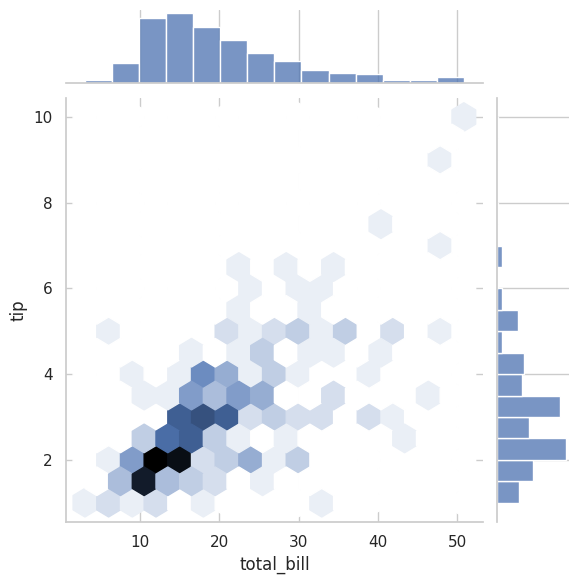

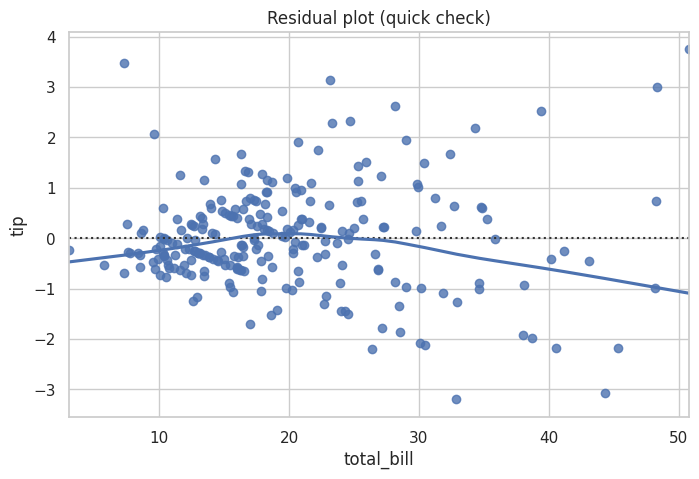

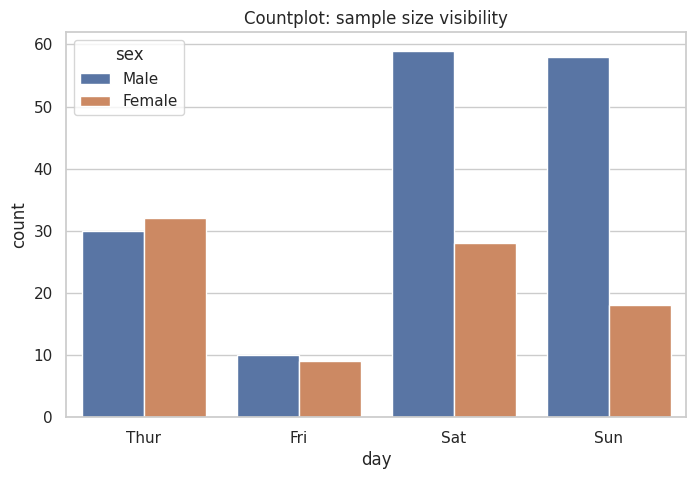

In [62]:

sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")
plt.show()

sns.residplot(data=tips, x="total_bill", y="tip", lowess=True)
plt.title("Residual plot (quick check)")
plt.show()

sns.countplot(data=tips, x="day", hue="sex")
plt.title("Countplot: sample size visibility")
plt.show()


**Research use cases**
- Joint distribution characterization (bivariate density) with large n; avoids overplotting.
- Useful for checking dependence structure and heteroscedasticity hints.

**When not to use**
- If sample size is small: bins can mislead; use scatter + marginal distributions.

**Alternative plots**
- Scatter + marginal KDE, hexbin, contour density, copula plots.

**Typical reviewer criticisms**
- “Bin size/hex resolution not justified.”
- “Outliers drive perceived structure—show robust view or clipping rationale.”

**Plot-specific notes**
- Provide a sensitivity view (different grids) if structure is central to conclusions.



### Exercise 2 (Seaborn)
Using a dataset of your choice:
1. Show **3 distribution views** (hist/KDE, ECDF, violin/box).
2. Show **1 multivariate view** (pairplot or FacetGrid).
3. Write: what inference is valid and what would be over-interpretation?


### Exercise 3: Detecting Visual Manipulation

In this exercise, you will analyze two visualizations of the same dataset.

Both plots display the same numerical values.

However, one of them is visually misleading.

Your task:

1. Identify which plot is misleading.
2. Explain precisely why.
3. Describe what design decision causes the distortion.
4. Propose a corrected version.

Focus on:
- Axis scaling
- Baseline choices
- Perceptual encoding
- Cognitive exaggeration

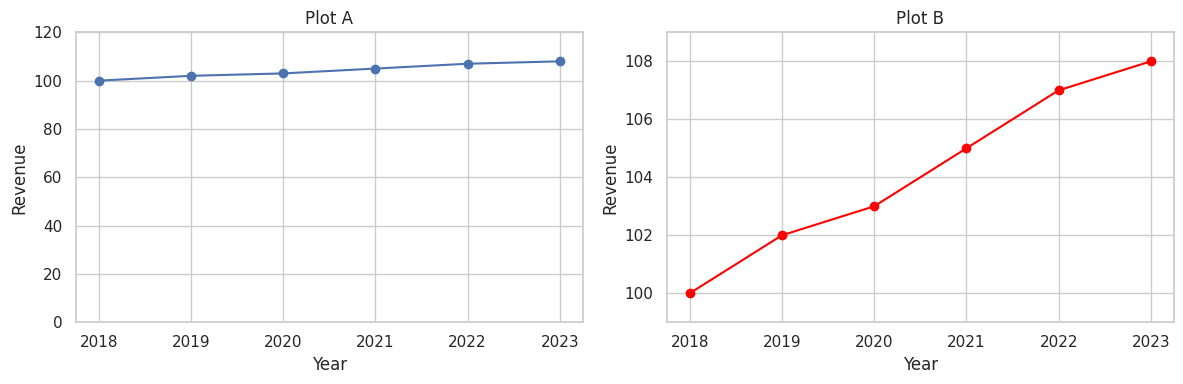

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic dataset: small steady growth
years = np.arange(2018, 2024)
values = np.array([100, 102, 103, 105, 107, 108])

# Plot 1 — Honest representation
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(years, values, marker="o")
plt.title("Plot A")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.ylim(0, 120)  # Full baseline
plt.grid(True)

# Plot 2 — Manipulated representation
plt.subplot(1,2,2)
plt.plot(years, values, marker="o", color="red")
plt.title("Plot B")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.ylim(99, 109)  # Truncated axis exaggerates change
plt.grid(True)

plt.tight_layout()
plt.show()



### Questions

1. Which plot exaggerates growth?
2. How does axis truncation influence perception?
3. Does the underlying data support dramatic conclusions?
4. When (if ever) is axis truncation acceptable?
5. How would you redesign the misleading plot to preserve honesty but maintain readability?

### Exercise 4 : Misleading Area Chart vs Line Chart

This exercise compares two visualizations of the **same time series**.

Both are valid charts, but one can become misleading because **area encoding** tends to make changes feel larger than they are, especially when the baseline and context are not emphasized.

Your tasks:

1. Which chart is more likely to exaggerate growth perceptually?
2. Explain why **area** can be more persuasive (and less precise) than a **line**.
3. Propose a safer alternative if the goal is scientific communication.


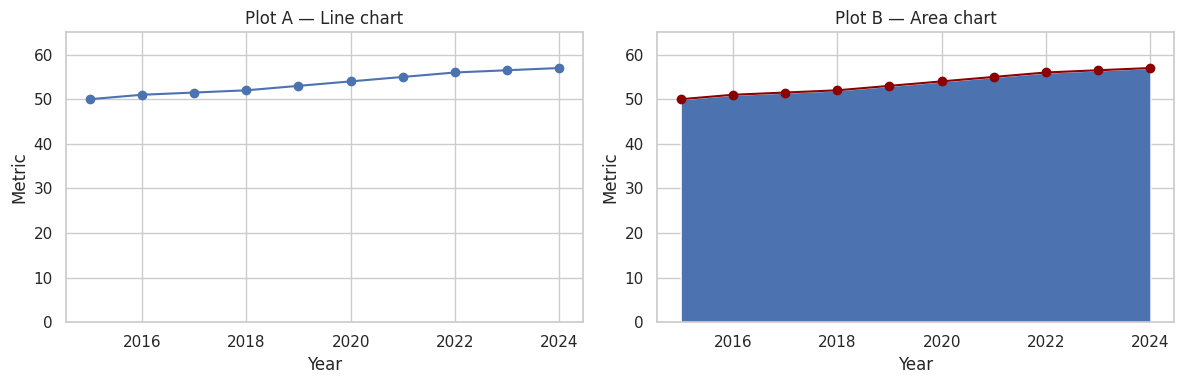

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Same data in both plots: moderate increase
t = np.arange(2015, 2025)
y = np.array([50, 51, 51.5, 52, 53, 54, 55, 56, 56.5, 57])

plt.figure(figsize=(12,4))

# Plot A — Line chart (usually safer for precise comparison)
plt.subplot(1,2,1)
plt.plot(t, y, marker="o")
plt.title("Plot A — Line chart")
plt.xlabel("Year")
plt.ylabel("Metric")
plt.ylim(0, 65)   # contextual baseline
plt.grid(True)

# Plot B — Area chart (can exaggerate perceived magnitude)
plt.subplot(1,2,2)
plt.plot(t, y, marker="o", color="darkred")
plt.fill_between(t, y, 0)  # filled area to baseline
plt.title("Plot B — Area chart")
plt.xlabel("Year")
plt.ylabel("Metric")
plt.ylim(0, 65)
plt.grid(True)

plt.tight_layout()
plt.show()


### Reflection Questions

1. Do both plots show the same numeric change?
2. Why might the area chart feel “more dramatic” even though the slope is the same?
3. In what contexts is an area chart appropriate (e.g., cumulative totals)?
4. If you must use area, what safeguards can you add?
   - show data labels / annotations
   - keep baseline at 0
   - use small multiples
   - add uncertainty bands


## 3. Interactive Visualization with Plotly

Plotly is an interactive inference interface:
- zoom/pan,
- hover inspection,
- animation (time),
- interactive filtering patterns.

Scientific warning: interactivity can increase cherry-picking risk.


In [63]:
gap = px.data.gapminder(); stocks = px.data.stocks();


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”


### 3.1 Scatter with marginal distributions

**What this shows**  
Scatter plot + marginal summaries on each axis.

**Power**  
- Joint structure + univariate distributions in one view.  
- Hover reveals outliers and influential points.

**Pitfall**  
- Log scales change interpretation—label clearly and justify.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [64]:
#import sys
#!{sys.executable} -m pip install -U nbformat==4.3.0 ipython


In [65]:
import nbformat, IPython
print("nbformat:", nbformat.__version__)
print("ipython:", IPython.__version__)


nbformat: 5.10.4
ipython: 9.10.0


In [66]:
import plotly.io as pio
#pio.renderers.default = "notebook_connected"  # or "notebook"
#pio.renderers.default = "iframe"
pio.renderers.default = "browser"

In [67]:

fig = px.scatter(
    gap.query("year==2007"),
    x="gdpPercap", y="lifeExp",
    color="continent", size="pop",
    log_x=True, hover_name="country",
    marginal_x="box", marginal_y="violin",
    title="Gapminder (2007): lifeExp vs GDP"
)
fig.show()


**Research use cases**
- Outlier inspection and interactive sanity checks; exploratory model criticism.
- Useful in supplement materials as interactive HTML.

**When not to use**
- As sole evidence in a paper: reviewers require reproducible static summaries + uncertainty.

**Alternative plots**
- Static scatter with density contours, hexbin; binned scatter with CIs.

**Typical reviewer criticisms**
- “Interactivity may enable cherry-picking; provide fixed views and pre-specified filters.”

**Plot-specific notes**
- Save the exact filter state and report it (or export static snapshots).


### 3.2 Animation over time

**What this shows**  
Dynamic evolution of a relationship over time.

**Scientific role**  
- Detects regime changes; supports longitudinal hypothesis testing.

**Pitfalls**  
- Animation is persuasive; allow inspection of fixed frames and document choices.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [68]:

fig = px.scatter(
    gap,
    x="gdpPercap", y="lifeExp",
    animation_frame="year", animation_group="country",
    size="pop", color="continent",
    log_x=True, hover_name="country",
    title="Gapminder over time (animation)"
)
fig.show()


**Research use cases**
- Detect regime changes and longitudinal dynamics.
- Communicate temporal evolution in teaching/demos; supplement interactive appendix.

**When not to use**
- In the main paper figure if key comparisons require precise reading; provide key frames as static panels.

**Alternative plots**
- Small multiples over time, slope graphs, time-conditioned regression lines.

**Typical reviewer criticisms**
- “Animation is not reproducible in print; include representative frames and quantitative summaries.”

**Plot-specific notes**
- Select and justify key frames; include a table of summary metrics across time.


### 3.3 Multi-line time series

**What this shows**  
Multiple temporal signals in the same coordinate system.

**Scientific role**  
- Compare dynamics, volatility, co-movement; supports monitoring/anomaly detection.

**Pitfall**  
- Too many lines → clutter; use faceting or normalization.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [69]:

fig = px.line(stocks, x="date", y=["GOOG","AAPL","AMZN"], title="Stocks time series")
fig.show()


**Research use cases**
- Monitoring and temporal dynamics: volatility, seasonality, anomalies, drift.
- Supports alert design and operational dashboards.

**When not to use**
- Many series without grouping: spaghetti plots become unreadable.

**Alternative plots**
- Faceted small multiples, rolling quantile bands, decomposition plots, heatmaps over time.

**Typical reviewer criticisms**
- “Smoothing/aggregation not specified.”
- “Uncertainty missing (confidence bands, predictive intervals).”

**Plot-specific notes**
- Consider adding uncertainty bands or rolling quantiles if used for inference.


### 3.4 Distributions (hist/violin/box)

**Why interactive distributions help**  
Rapid comparison across groups and identification of unusual subsets.

**Scientific note**  
Exploration must be paired with reproducible summaries (save filters / document choices).


In [70]:

fig = px.histogram(tips, x="total_bill", color="day", nbins=40, barmode="overlay", opacity=0.6,
                   title="Histogram: total_bill by day")
fig.show()

fig = px.violin(tips, x="day", y="total_bill", color="sex", box=True, points="all",
                title="Violin + box + points: total_bill by day and sex")
fig.show()

fig = px.box(tips, x="day", y="tip", color="smoker", points="all", title="Boxplot: tip by day and smoker")
fig.show()


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”


### 3.5 Heatmap and parallel coordinates

**What these show**  
- Heatmap: matrix patterns.  
- Parallel coordinates: high-dimensional structure and separation.

**Pitfall**  
Parallel coordinates can be hard with many samples—use filtering and grouping.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [71]:

z = np.corrcoef(np.random.randn(50, 200))
fig = px.imshow(z, aspect="auto", title="Interactive heatmap (example matrix)")
fig.show()

iris_px = px.data.iris()
fig = px.parallel_coordinates(
    iris_px,
    color="species_id",
    dimensions=["sepal_length","sepal_width","petal_length","petal_width"],
    title="Parallel coordinates: Iris"
)
fig.show()


**Research use cases**
- Visualize matrices (correlation/similarity/attention weights).
- Identify block structure or artifacts.

**When not to use**
- If numeric comparisons must be exact: add annotations or companion table.

**Alternative plots**
- Clustered heatmaps, network graphs, PCA ordering.

**Typical reviewer criticisms**
- “Color scale choice biases interpretation; justify and ensure perceptual uniformity.”

**Plot-specific notes**
- Use perceptually uniform colormaps when possible; mark missing data explicitly.


### 3.6 Hierarchies: treemap & sunburst

**What these show**  
Hierarchical decomposition of a total across groups/subgroups.

**Scientific role**  
Composition analysis and dominant contributor discovery.

**Pitfall**  
Area perception is less accurate than position—avoid for precise comparisons.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [72]:

fig = px.treemap(gap.query("year==2007"), path=["continent","country"], values="pop", color="lifeExp",
                 title="Treemap: population by continent/country (color=lifeExp)")
fig.show()

fig = px.sunburst(gap.query("year==2007"), path=["continent","country"], values="pop",
                  title="Sunburst: population hierarchy")
fig.show()


**Research use cases**
- Composition analysis: identify dominant contributors and hierarchical structure.

**When not to use**
- When precise comparisons are required: area judgments are imprecise.

**Alternative plots**
- Sorted bar charts, dot plots, stacked bars with uncertainty.

**Typical reviewer criticisms**
- “Area encoding is hard to compare; provide numeric table or bar alternative.”

**Plot-specific notes**
- Use treemap for exploration; convert key findings to position-based plots in the paper.



### Exercise 3 (Plotly)
Create an interactive figure that enables:
- inspecting outliers via hover,
- comparing at least two groups,
- (optional) animation or facets.



## 4. Bayesian Inference & Uncertainty (3 chapters)

We use PyMC + ArviZ for:
- priors and posterior sensitivity,
- MCMC diagnostics (R-hat, ESS),
- posterior predictive checks (PPC),
- hierarchical shrinkage,
- calibration and probabilistic diagnostics.


In [73]:

# Bayesian stack imports (install if needed):
#   pip install pymc arviz pytensor scipy
try:
    import pymc as pm
    import arviz as az
    import scipy.stats as st
    az.style.use("arviz-darkgrid")
    _BAYES_OK = True
except Exception as e:
    _BAYES_OK = False
    print("Bayesian section disabled (missing dependency). Error:", e)


Bayesian section disabled (missing dependency). Error: No module named 'pymc'


### Chapter 1 — Beta–Binomial (conjugate) + visualization

**Goal**  
Show Bayesian updating: prior → posterior.

**Scientific role**  
Prior sensitivity + probabilistic credible intervals.

**Pitfall**  
Priors can dominate at small n; justify and report sensitivity.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [74]:
if _BAYES_OK:

    n = 50
    k = 32
    a0, b0 = 2, 2
    posterior_a, posterior_b = a0 + k, b0 + (n - k)

    p = np.linspace(0, 1, 500)
    prior_pdf = st.beta.pdf(p, a0, b0)
    post_pdf  = st.beta.pdf(p, posterior_a, posterior_b)

    plt.figure()
    plt.plot(p, prior_pdf, label=f"Prior Beta({a0},{b0})")
    plt.plot(p, post_pdf,  label=f"Posterior Beta({posterior_a},{posterior_b})")
    plt.axvline(k/n, linestyle="--", label="MLE k/n")
    plt.title("Beta–Binomial: prior vs posterior")
    plt.xlabel("p")
    plt.ylabel("density")
    plt.legend()
    plt.show()

    print("Posterior mean:", posterior_a/(posterior_a+posterior_b))
    print("95% credible interval:", st.beta.ppf([0.025,0.975], posterior_a, posterior_b))
else:
    print('Skipped: _BAYES_OK is False')


Skipped: _BAYES_OK is False


**Research use cases**
- Use to test assumptions, spot artifacts, and communicate uncertainty.

**When not to use**
- When it hides uncertainty or relies on weak perceptual encodings for precise claims.

**Alternative plots**
- ECDF, quantile bands, uncertainty overlays, small multiples.

**Typical reviewer criticisms**
- “Uncertainty missing.” “Choices not justified.” “Over-interpretation.”


### Chapter 2 — Bayesian linear regression (MCMC) + diagnostics + PPC

**Goal**  
Estimate parameters and uncertainty; validate via diagnostics and PPC.

**Scientific role**  
Trace plots and PPC reveal sampler issues and model misspecification.

**Pitfall**  
Never trust posteriors without diagnostics.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [75]:
if _BAYES_OK:

    X = np.linspace(0, 10, 120)
    true_intercept, true_slope, true_sigma = 1.0, 2.7, 1.5
    y = true_intercept + true_slope*X + np.random.normal(0, true_sigma, size=len(X))

    with pm.Model() as linreg:
        intercept = pm.Normal("intercept", mu=0, sigma=10)
        slope = pm.Normal("slope", mu=0, sigma=10)
        sigma = pm.HalfNormal("sigma", sigma=5)

        mu = intercept + slope*X
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(1500, tune=1000, target_accept=0.9, chains=2, progressbar=False)

    az.summary(trace, var_names=["intercept","slope","sigma"])
else:
    print('Skipped: _BAYES_OK is False')


Skipped: _BAYES_OK is False


In [76]:
if _BAYES_OK:

    az.plot_trace(trace, var_names=["intercept","slope","sigma"])
    plt.show()

    az.plot_posterior(trace, var_names=["intercept","slope","sigma"])
    plt.show()

    with linreg:
        ppc = pm.sample_posterior_predictive(trace, progressbar=False)

    idata = az.from_pymc(trace=trace, posterior_predictive=ppc)
    az.plot_ppc(idata, num_pp_samples=50)
    plt.show()

    post = trace.posterior.stack(draw=("chain","draw"))
    intercepts = post["intercept"].values
    slopes = post["slope"].values

    plt.figure()
    plt.scatter(X, y, alpha=0.6, label="Data")
    for i in range(150):
        plt.plot(X, intercepts[i] + slopes[i]*X, color="gray", alpha=0.03)
    plt.title("Posterior regression lines (epistemic uncertainty)")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
else:
    print('Skipped: _BAYES_OK is False')


Skipped: _BAYES_OK is False


**Research use cases**
- Check MCMC convergence and mixing; essential to defend Bayesian results in review.

**When not to use**
- Never omit: if you report Bayesian inference, reviewers expect convergence evidence.

**Alternative plots**
- Rank plots, energy/BFMI diagnostics, pair plots of parameters.

**Typical reviewer criticisms**
- “Chains did not mix; R-hat/ESS not reported.”
- “Tuning insufficient; results unreliable.”

**Plot-specific notes**
- Report R-hat, ESS, divergences, BFMI; consider reparameterization if problematic.


### Chapter 3 — Hierarchical model + calibration diagnostics

**Goal**  
Demonstrate partial pooling and connect probabilistic thinking to ML calibration.

**Scientific role**  
Hierarchical shrinkage reduces overfitting; calibration assesses probability reliability.

**Research use cases**
- Use this plot to **test model assumptions**, **detect artifacts**, and **communicate uncertainty** during peer review.
- Typical tasks: *outlier detection*, *distribution shift inspection*, *model criticism*, *feature effect exploration*, *monitoring and alert design*.

**When not to use this plot**
- When it hides the key uncertainty (e.g., summarizing complex distributions as a single mean).
- When sample sizes are tiny and the plot may overstate patterns (add raw points / intervals).
- When perceptual encoding is weak for precise comparison (area-based charts for exact ranking).

**Alternative plots**
- If you need robustness: ECDF, box + strip, ridge plots, quantile bands.
- If you need uncertainty: bootstrap CIs, Bayesian credible bands, PPC overlays.
- If you need high-dimensional structure: pairplot, parallel coordinates, UMAP/t-SNE (with caution), partial dependence / ICE.

**Typical reviewer criticisms**
- “Where is the uncertainty / sampling variability?”
- “Are you cherry-picking scales, bins, smoothing bandwidth, or subsets?”
- “Do these visuals justify causality claims?”
- “How sensitive are conclusions to preprocessing choices (filtering, normalization, aggregation)?”


In [77]:
if _BAYES_OK:

    n_groups = 6
    group = np.random.randint(0, n_groups, 400)
    Xh = np.random.uniform(0, 10, 400)
    true_group_effect = np.random.normal(0, 1.0, n_groups)
    yh = 1.0 + true_group_effect[group] + 0.7*Xh + np.random.normal(0, 1.2, 400)

    with pm.Model() as hier:
        mu_a = pm.Normal("mu_a", 0, 2)
        sigma_a = pm.HalfNormal("sigma_a", 2)
        a = pm.Normal("a", mu=mu_a, sigma=sigma_a, shape=n_groups)

        b = pm.Normal("b", 0, 2)
        sigma = pm.HalfNormal("sigma", 2)

        mu = 1.0 + a[group] + b*Xh
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=yh)

        hier_trace = pm.sample(1200, tune=800, target_accept=0.9, chains=2, progressbar=False)

    az.plot_forest(hier_trace, var_names=["a"], combined=True)
    plt.title("Hierarchical group intercepts: posterior intervals")
    plt.show()
else:
    print('Skipped: _BAYES_OK is False')


Skipped: _BAYES_OK is False


**Research use cases**
- Communicate group-level/posterior interval estimates compactly (hierarchical models).
- Excellent for subgroup comparisons and partial pooling evidence.

**When not to use**
- Without stating shrinkage/partial pooling assumptions; reviewers will ask about hierarchy.

**Alternative plots**
- Caterpillar plots, posterior violin per group, rank-ordered intervals.

**Typical reviewer criticisms**
- “Group effects not identifiable; priors too strong/weak.”
- “No PPC for grouped structure.”

**Plot-specific notes**
- Report group sample sizes and show pooling effect (raw vs pooled estimates).


AUC: 0.9948637316561845


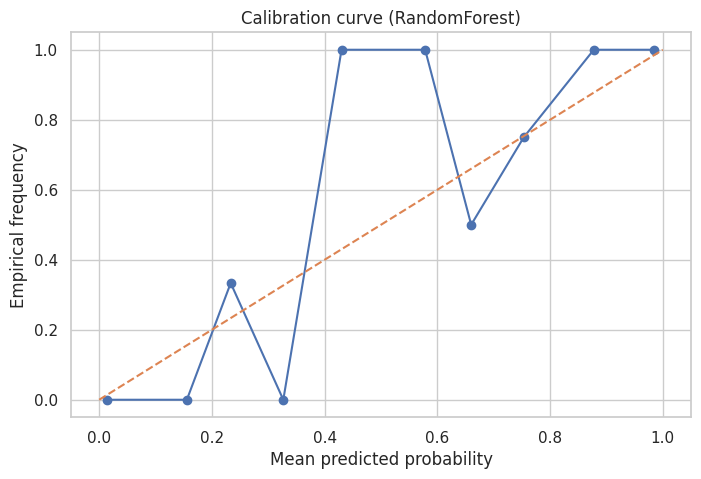

In [78]:

data = load_breast_cancer(as_frame=True)
Xc = data.data
yc = data.target

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

Xtr, Xte, ytr, yte = train_test_split(Xc, yc, test_size=0.25, random_state=42, stratify=yc)
model.fit(Xtr, ytr)

proba = model.predict_proba(Xte)[:,1]
auc = roc_auc_score(yte, proba)
print("AUC:", auc)

prob_true, prob_pred = calibration_curve(yte, proba, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1],[0,1], linestyle="--")
plt.title("Calibration curve (RandomForest)")
plt.xlabel("Mean predicted probability")
plt.ylabel("Empirical frequency")
plt.show()


**Research use cases**
- Evaluate probabilistic predictions: over/underconfidence; crucial for decision systems.
- Compare calibration across subgroups (fairness) and across time (drift).

**When not to use**
- Without reporting binning scheme and sample sizes per bin; curve can mislead.

**Alternative plots**
- Reliability diagrams with confidence bands, expected calibration error (ECE), Brier decomposition.

**Typical reviewer criticisms**
- “No uncertainty bands; curve differences may be noise.”
- “Binning choice affects results; provide sensitivity.”

**Plot-specific notes**
- Add bootstrap confidence intervals per bin; report ECE/Brier alongside curve.



### Exercise 4 (Bayesian)
1. Replace Gaussian likelihood in Chapter 2 with Student-T likelihood and compare PPC.
2. Compute LOO with ArviZ for model comparison.
3. Report how robust likelihood changes uncertainty bands.



## 5. Production Stack: PostgreSQL/TimescaleDB + Grafana + Dash

We store model monitoring metrics in TimescaleDB and visualize them in Grafana and Dash.
This package includes a Docker Compose stack and a provisioned Grafana dashboard.


### 5.1 Minimal SQL schema (model_metrics)

In [79]:

schema_sql = '''
CREATE TABLE IF NOT EXISTS model_metrics (
  time TIMESTAMPTZ NOT NULL,
  y_true DOUBLE PRECISION,
  y_pred DOUBLE PRECISION,
  y_lower DOUBLE PRECISION,
  y_upper DOUBLE PRECISION,
  anomaly_flag INTEGER,
  drift_score DOUBLE PRECISION
);

SELECT create_hypertable('model_metrics', 'time', if_not_exists => TRUE);
'''
print(schema_sql)



CREATE TABLE IF NOT EXISTS model_metrics (
  time TIMESTAMPTZ NOT NULL,
  y_true DOUBLE PRECISION,
  y_pred DOUBLE PRECISION,
  y_lower DOUBLE PRECISION,
  y_upper DOUBLE PRECISION,
  anomaly_flag INTEGER,
  drift_score DOUBLE PRECISION
);

SELECT create_hypertable('model_metrics', 'time', if_not_exists => TRUE);



### 5.2 Insert synthetic monitoring data into the DB

**What this does**  
Writes time-stamped metrics to TimescaleDB for monitoring.

**Scientific role**  
Bridges research diagnostics to operational dashboards (Grafana + Dash).


In [80]:
# ============================================================
# 5.2 Insert synthetic monitoring data into PostgreSQL
# ============================================================

# Optional dependency
try:
    import psycopg2
    _PG_OK = True
    print("psycopg2 available.")
except Exception as e:
    _PG_OK = False
    print("PostgreSQL section disabled (missing psycopg2-binary).")
    print("Install with: pip install psycopg2-binary")
    print("Error:", e)

import numpy as np
import datetime


def generate_stream(t):
    """
    Simulates a drifting time-series with occasional anomalies.

    Scientific purpose:
    - Baseline slow drift
    - Gaussian noise
    - Rare anomaly spikes
    """
    baseline = 10 + 0.02 * t
    noise = np.random.normal(0, 0.7)
    anomaly = np.random.choice([0, 5], p=[0.98, 0.02])
    return baseline + noise + anomaly


# PostgreSQL connection parameters
PG = dict(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="postgres"
)


if _PG_OK:

    try:
        print("Connecting to PostgreSQL...")
        conn = psycopg2.connect(**PG)
        cur = conn.cursor()

        # Enable TimescaleDB
        cur.execute("CREATE EXTENSION IF NOT EXISTS timescaledb;")

        # Create monitoring table
        cur.execute("""
        CREATE TABLE IF NOT EXISTS model_metrics (
            time TIMESTAMPTZ NOT NULL,
            y_true DOUBLE PRECISION,
            y_pred DOUBLE PRECISION,
            y_lower DOUBLE PRECISION,
            y_upper DOUBLE PRECISION,
            anomaly_flag INTEGER,
            drift_score DOUBLE PRECISION
        );
        """)

        # Convert table into hypertable (TimescaleDB)
        cur.execute("""
        SELECT create_hypertable('model_metrics', 'time', if_not_exists => TRUE);
        """)

        conn.commit()

        print("Inserting synthetic time-series data...")

        now = datetime.datetime.now(datetime.timezone.utc)

        for i in range(240):

            y_true = generate_stream(i)

            # Simulated prediction + predictive interval
            y_pred = y_true + np.random.normal(0, 0.2)
            y_lower = y_pred - 1.5
            y_upper = y_pred + 1.5

            anomaly = int((y_true < y_lower) or (y_true > y_upper))

            # Artificial drift score increasing over time
            drift_score = float(
                abs(np.random.normal(0.0, 0.3)) + 0.03 * i / 240
            )

            cur.execute(
                """
                INSERT INTO model_metrics 
                (time, y_true, y_pred, y_lower, y_upper, anomaly_flag, drift_score)
                VALUES (%s, %s, %s, %s, %s, %s, %s)
                """,
                (
                    now + datetime.timedelta(seconds=i),
                    float(y_true),
                    float(y_pred),
                    float(y_lower),
                    float(y_upper),
                    anomaly,
                    drift_score
                )
            )

        conn.commit()
        conn.close()

        print("Inserted 240 rows into model_metrics successfully.")

    except Exception as e:
        print("Database operation failed.")
        print("Is Docker stack running?")
        print("Error:", e)

else:
    print("Skipping DB insertion because psycopg2 is not available.")


psycopg2 available.
Connecting to PostgreSQL...
Inserting synthetic time-series data...


Inserted 240 rows into model_metrics successfully.


#### Docker Installation on Linux

sudo apt update
sudo apt install docker.io


sudo systemctl enable docker
sudo systemctl start docker

sudo usermod -aG docker $USER

docker --version
docker compose version


### 5.3 Grafana: example SQL queries

**Time series**
```sql
SELECT time, y_true, y_pred FROM model_metrics WHERE $__timeFilter(time) ORDER BY time;
```

**Anomaly rate**
```sql
SELECT
  $__timeGroup(time, '1m') AS time,
  AVG(anomaly_flag) AS anomaly_rate
FROM model_metrics
WHERE $__timeFilter(time)
GROUP BY 1
ORDER BY 1;
```

**Drift score**
```sql
SELECT time, drift_score FROM model_metrics WHERE $__timeFilter(time) ORDER BY time;
```



## 6. Explainability: SHAP 

We compute SHAP values for a tree model and visualize:
- summary plot (global importance),
- dependence plot (feature effects + interactions).

The Dash app includes an interactive SHAP page.

# SHAP — A Game-Theoretic Approach to Model Explainability

## What is SHAP?

SHAP (SHapley Additive exPlanations) is a method to explain machine learning predictions using **Shapley values** from cooperative game theory.

Each feature is treated as a "player" contributing to the model's output.

The prediction is decomposed as:

Prediction = Baseline + Σ Feature Contributions

Where:
- Baseline = expected model output
- Feature contribution = average marginal impact of that feature across all possible subsets

This guarantees:
- Fairness
- Additivity
- Symmetry
- Theoretical consistency

SHAP explains **model behavior**, not the real-world causal process.


In [ ]:
from IPython.display import Image, display

# URL de l'image
url = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*FPm4LZEiUji5XWyyfj4-SA.png" #Ref : An Introduction to Explainable AI and SHAP - MEDIUM

# Affichage de l'image
display(Image(url=url))

# SHAP ≠ Causality

SHAP answers:

> "How does the model use this feature?"

Causal inference answers:

> "Does this feature cause the outcome in reality?"

## Key Difference

SHAP:
- Descriptive
- Based on model structure
- Depends on correlations in data

Causal inference:
- Requires assumptions (DAGs, interventions)
- Seeks counterfactual relationships
- Independent of model architecture

Example:

If SHAP says:
"Income increases predicted credit approval"

It means:
The model uses income positively.

It does NOT mean:
Income causes approval.

Always avoid causal language when interpreting SHAP.


# SHAP Stability Analysis

SHAP values can vary due to:

1. Random train/test splits
2. Model randomness (e.g., Random Forest seeds)
3. Correlated features
4. Background distribution choice

## Best Practices

- Compute SHAP across multiple folds
- Measure variance of mean |SHAP|
- Compare feature ranking stability
- Use grouped SHAP for correlated variables

In research papers, reviewers often ask:

- Is the explanation stable across retraining?
- Are top features consistent?
- Does feature ranking change significantly?


Mean |SHAP| values:
x1: 1.0006
x2: 1.4256


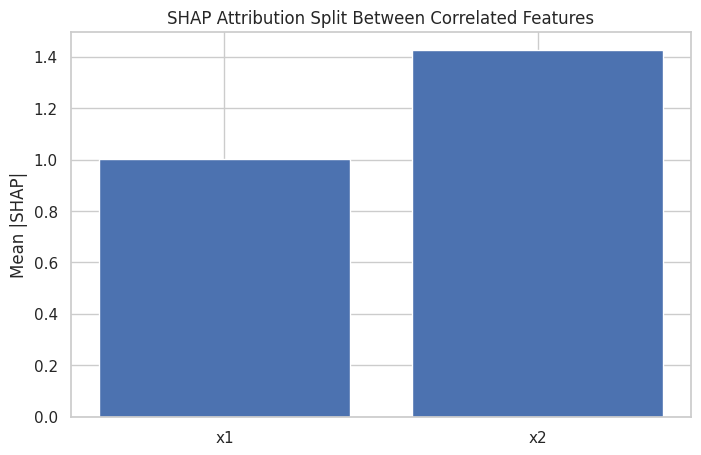

In [42]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create correlated features
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 0.01, n)  # highly correlated
y = 3 * x1 + np.random.normal(0, 0.5, n)

df = pd.DataFrame({"x1": x1, "x2": x2})

Xtr, Xte, ytr, yte = train_test_split(df, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(Xtr, ytr)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xte, check_additivity=False)

# Compare mean absolute SHAP
mean_abs = np.abs(shap_values).mean(axis=0)

print("Mean |SHAP| values:")
for f, val in zip(df.columns, mean_abs):
    print(f"{f}: {val:.4f}")

plt.bar(df.columns, mean_abs)
plt.title("SHAP Attribution Split Between Correlated Features")
plt.ylabel("Mean |SHAP|")
plt.show()


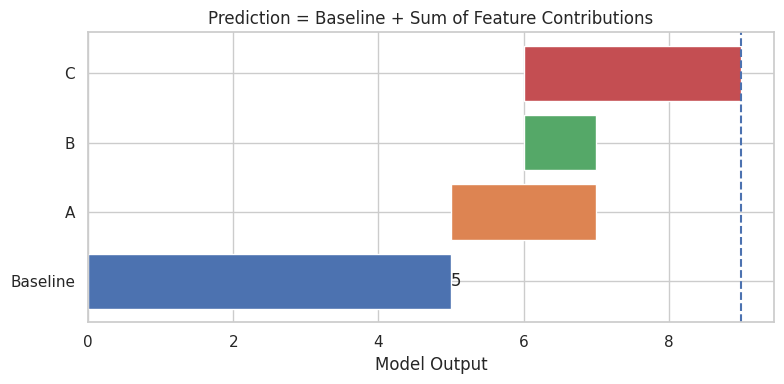

In [43]:
import matplotlib.pyplot as plt
import numpy as np

features = ["A", "B", "C"]
contributions = [2, -1, 3]

baseline = 5
prediction = baseline + sum(contributions)

plt.figure(figsize=(8,4))

current = baseline
plt.barh(["Baseline"], [baseline])
plt.text(baseline, 0, f"{baseline}", va="center")

for i, (f, c) in enumerate(zip(features, contributions)):
    plt.barh([f], [c], left=current)
    current += c

plt.axvline(prediction, linestyle="--")
plt.title("Prediction = Baseline + Sum of Feature Contributions")
plt.xlabel("Model Output")
plt.tight_layout()
plt.show()


Interpretation:

- Start from baseline (expected prediction).
- Each feature adds or subtracts contribution.
- Final sum equals model prediction.

This is the additive explanation principle behind SHAP.

In [ ]:
#!pip install ipywidgets shap

In [44]:

try:
    import shap
    _SHAP_OK = True
except Exception as e:
    _SHAP_OK = False
    print("SHAP section disabled (missing dependency). Error:", e)



### Exercise 5 (SHAP)
1. Train a different model.
2. Compare SHAP summary plots.
3. Provide one feature-interaction hypothesis from dependence plots.



## 7. Final Project: Bayesian Uncertainty Monitoring + Explainability

Build an end-to-end system that:
- estimates uncertainty (Bayesian or probabilistic),
- detects anomalies via predictive intervals,
- stores metrics in TimescaleDB,
- monitors in Grafana (with dashboard and alert design),
- explains predictions with SHAP in Dash.



## 8. Research Bibliography

1. Cleveland & McGill (1984) Graphical Perception (JASA).
2. Tufte (1983) The Visual Display of Quantitative Information.
3. Ware (2012) Information Visualization: Perception for Design.
4. Munzner (2014) Visualization Analysis and Design.
5. Wilkinson (2005) The Grammar of Graphics.
6. Cairo (2016) The Truthful Art.
7. Heer & Bostock (2010) Crowdsourcing graphical perception (CHI).
8. Correll & Gleicher (2014) Error Bars Considered Harmful (VIS).
9. Hullman & Gelman (2021) Interactive EDA theories (HDSR).
10. Kay et al. (2016) Hypothetical Outcome Plots (CHI).
11. Spiegelhalter et al. (2011) Visualizing uncertainty (Science).
12. Gelman et al. (2013) Bayesian Data Analysis (3rd ed.).
13. Gelman & Shalizi (2013) Philosophy and Bayesian practice (BJMSP).
14. Vehtari, Gelman, Gabry (2017) LOO / WAIC (Stats & Computing).
15. Betancourt (2017) Conceptual Introduction to HMC (arXiv).
16. Kumar et al. (2019) ArviZ (JOSS).
17. Salvatier et al. (2016) PyMC3 (PeerJ CS).
18. Carpenter et al. (2017) Stan (JSS).
19. Bingham et al. (2019) Pyro (JMLR).
20. Lundberg & Lee (2017) SHAP (NeurIPS).
21. Ribeiro et al. (2016) LIME (KDD).
22. Gama et al. (2014) Concept drift survey (ACM CSUR).
23. Sculley et al. (2015) ML technical debt (NeurIPS).


#### BONUS : Download Dataset

In [39]:
from pathlib import Path
import urllib.request
import zipfile
import pandas as pd

DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

DATASETS = {
    # --- Classical regression dataset for SHAP / uncertainty / diagnostics
    "wine_quality_red": {
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
        "path": DATA_DIR / "winequality-red.csv",
        "desc": "UCI Wine Quality (red) — regression + distribution diagnostics + SHAP."
    },
    "wine_quality_white": {
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
        "path": DATA_DIR / "winequality-white.csv",
        "desc": "UCI Wine Quality (white) — compare distributions + shift."
    },

    # --- Time-series / monitoring-ready dataset
    "nab_master": {
        "url": "https://github.com/numenta/NAB/archive/refs/heads/master.zip",
        "path": DATA_DIR / "NAB-master.zip",
        "desc": "Numenta Anomaly Benchmark — time series anomalies for TimescaleDB + Grafana."
    },

    # --- Easy time-series (small) for quick demos
    "air_passengers": {
        "url": "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
        "path": DATA_DIR / "airline-passengers.csv",
        "desc": "AirPassengers monthly series — trend/seasonality/anomalies."
    }
}

def download_file(url: str, dest: Path):
    dest.parent.mkdir(parents=True, exist_ok=True)
    if dest.exists() and dest.stat().st_size > 0:
        print(f"[cache] {dest.name} already exists.")
        return dest
    print(f"[download] {url} -> {dest}")
    urllib.request.urlretrieve(url, dest)
    return dest

def ensure_datasets():
    paths = {}
    for name, meta in DATASETS.items():
        paths[name] = download_file(meta["url"], meta["path"])

    # Unzip NAB if needed
    nab_zip = paths.get("nab_master")
    nab_root = DATA_DIR / "NAB-master"
    if nab_zip and nab_zip.exists() and (not nab_root.exists()):
        print("[unzip] NAB-master.zip")
        with zipfile.ZipFile(nab_zip, "r") as z:
            z.extractall(DATA_DIR)

    print("\n✅ Datasets ready:")
    for name, meta in DATASETS.items():
        print(f"- {name}: {meta['path']}  |  {meta['desc']}")
    return paths

paths = ensure_datasets()


[download] https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -> data/winequality-red.csv
[download] https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -> data/winequality-white.csv
[download] https://github.com/numenta/NAB/archive/refs/heads/master.zip -> data/NAB-master.zip
[download] https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv -> data/airline-passengers.csv
[unzip] NAB-master.zip

✅ Datasets ready:
- wine_quality_red: data/winequality-red.csv  |  UCI Wine Quality (red) — regression + distribution diagnostics + SHAP.
- wine_quality_white: data/winequality-white.csv  |  UCI Wine Quality (white) — compare distributions + shift.
- nab_master: data/NAB-master.zip  |  Numenta Anomaly Benchmark — time series anomalies for TimescaleDB + Grafana.
- air_passengers: data/airline-passengers.csv  |  AirPassengers monthly series — trend/seasonality/anomalies.


In [40]:
df_air = pd.read_csv(paths["air_passengers"])
df_air.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [41]:
df_wine = pd.read_csv(paths["wine_quality_red"], sep=";")
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
